# Import Libraries

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
#from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
#from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score
#from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Reading the Dataset

In [173]:
mshrm_clf=pd.read_csv(r'E:\Alien Brains\mushrooms.csv')
mshrm_clf.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Data Analysis

In [174]:
mshrm_clf.shape

(8124, 23)

There are 8124 rows & 23 columns. This means there are 8124 datapoints in the dataset & 23 features.

In [175]:
mshrm_clf.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [176]:
mshrm_clf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

# Check for the Missing Values in the Dataset

In [177]:
mshrm_clf.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Encoding (Use Label encoding)

In [178]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
def Label_enc(feature):
    LE = LabelEncoder()
    LE.fit(feature)
    print(feature.name,LE.classes_)
    return LE.transform(feature)
#The transform() function is used to call function (func) on self producing a DataFrame
#with transformed values and that has the same axis length as self.
#In this article, we will cover the following most frequently used Pandas transform() features:
#Transforming values
#Combining groupby() results
#Filtering data
#Handling missing value at the group level
#mshrm_clf['Label'] = mshrm_clf['class'].map({'e':0, 'p':1})
#mshrm_clf

In [179]:
for col in mshrm_clf.columns:
    mshrm_clf[(col)] = Label_enc(mshrm_clf[(col)])

class ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [181]:
mshrm_clf
# p means 1 and e means 0

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [182]:
titles_dummies = pd.get_dummies(mshrm_clf['cap-surface'],prefix='cap-surface')#here we used get_dummies()-to do the one hot encoding 
#prefix='title'
#here we get-title_master/title_miss---- like this....
mshrm_clf = pd.concat([mshrm_clf, titles_dummies], axis=1)#title dummies addd to the titanic dataset in column wise
mshrm_clf.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,veil-color,ring-number,ring-type,spore-print-color,population,habitat,cap-surface_0,cap-surface_1,cap-surface_2,cap-surface_3
0,1,5,2,4,1,6,1,0,1,4,...,2,1,4,2,3,5,0,0,1,0
1,0,5,2,9,1,0,1,0,0,4,...,2,1,4,3,2,1,0,0,1,0
2,0,0,2,8,1,3,1,0,0,5,...,2,1,4,3,2,3,0,0,1,0
3,1,5,3,8,1,6,1,0,1,5,...,2,1,4,2,3,5,0,0,0,1
4,0,5,2,3,0,5,1,1,0,4,...,2,1,0,3,0,1,0,0,1,0
5,0,5,3,9,1,0,1,0,0,5,...,2,1,4,2,2,1,0,0,0,1
6,0,0,2,8,1,0,1,0,0,2,...,2,1,4,2,2,3,0,0,1,0
7,0,0,3,8,1,3,1,0,0,5,...,2,1,4,3,3,3,0,0,0,1
8,1,5,3,8,1,6,1,0,1,7,...,2,1,4,2,4,1,0,0,0,1
9,0,0,2,9,1,0,1,0,0,2,...,2,1,4,2,3,3,0,0,1,0


# Data Visualization

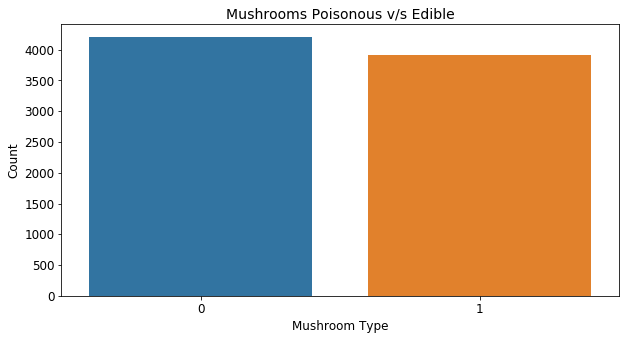

In [183]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Mushrooms Poisonous v/s Edible', fontsize=14)
sns.countplot(x="class", data=mshrm_clf)
plt.xlabel("Mushroom Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

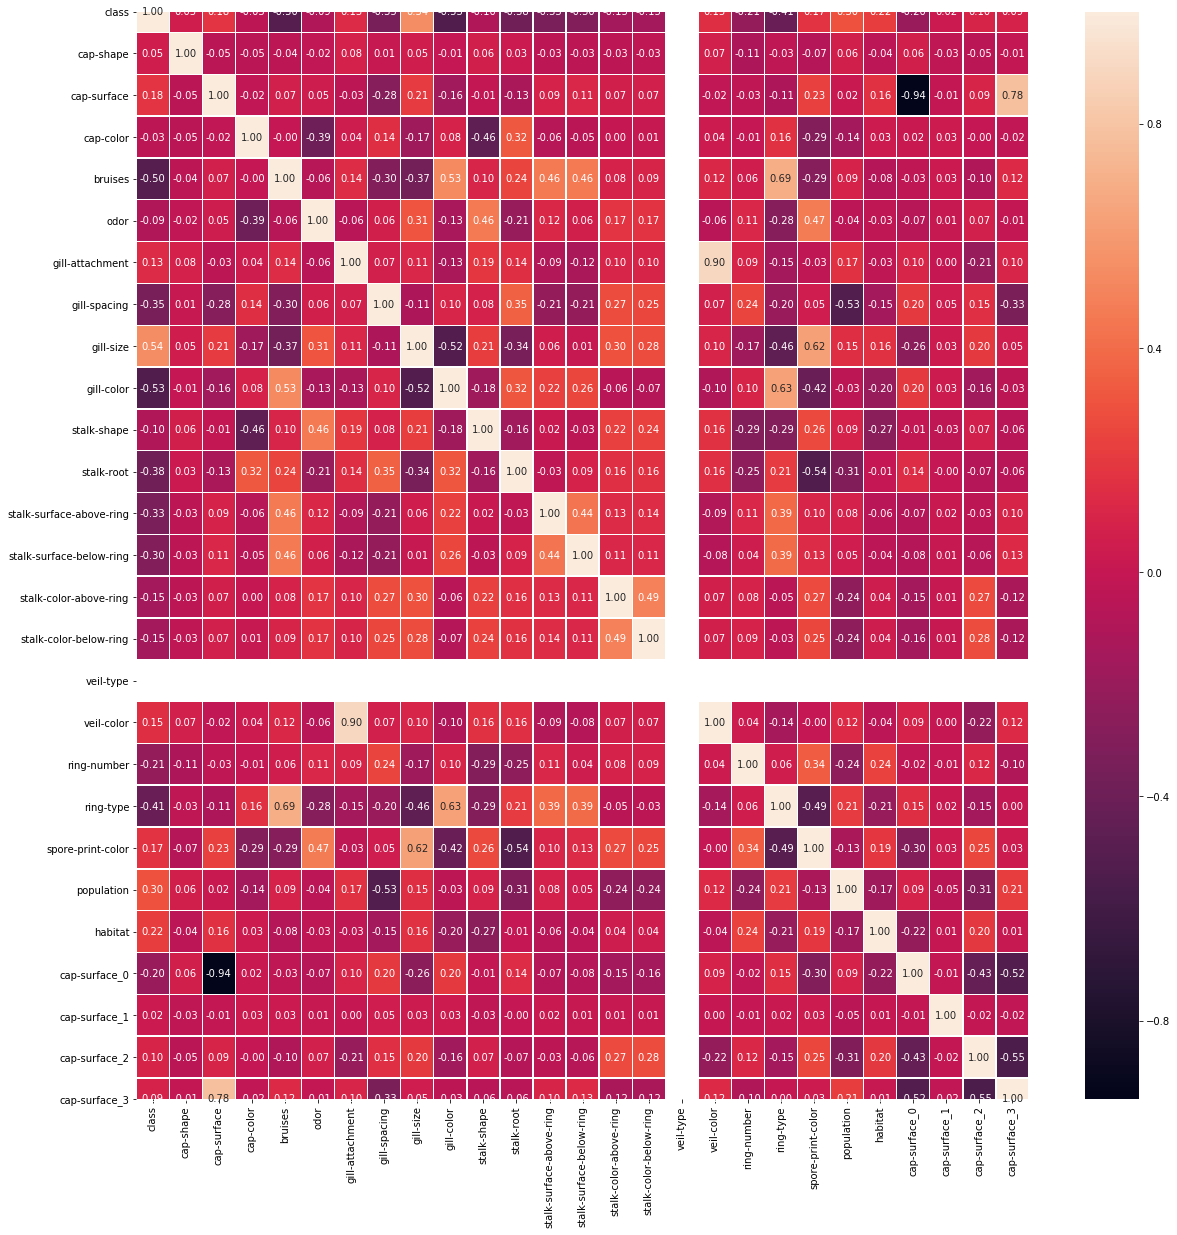

In [184]:
plt.figure(figsize=(20,20))
sns.heatmap(mshrm_clf.corr(), annot=True, linewidths=0.4, fmt= '.2f')

In [185]:
mshrm_clf.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,veil-color,ring-number,ring-type,spore-print-color,population,habitat,cap-surface_0,cap-surface_1,cap-surface_2,cap-surface_3
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179,-0.195415,0.023007,0.095454,0.088677
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221,0.063261,-0.025569,-0.048539,-0.011163
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887,-0.939604,-0.014937,0.094941,0.777225
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925,0.017251,0.030475,-0.001870,-0.015518
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095,-0.028808,0.026321,-0.104439,0.124401
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610,-0.066307,0.009024,0.072834,-0.008314
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304,0.102989,0.003615,-0.210358,0.104304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680,0.202414,0.050573,0.152145,-0.333229
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418,-0.257889,0.033174,0.198257,0.048362
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972,0.200085,0.032534,-0.160545,-0.033784


In [186]:
#mshrm_clf.groupby(['cap-shape'])['class'].value_counts().to_frame()

# Build the Models

In [187]:
X_train = mshrm_clf.drop("class", axis=1)#drop the  column from dataset
Y_train = mshrm_clf["class"]#took only the column and save into the t_train(survived)

In [188]:
Y_train

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [189]:
from sklearn.model_selection import train_test_split

# splitting data in training set(70%) and test set(30%).
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)

In [190]:
x_train.shape

(5686, 26)

In [191]:
y_train.shape

(5686,)

In [192]:
x_test.shape

(2438, 26)

In [193]:
y_test.shape

(2438,)

# Logistic Regression

In [194]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() #create the object of the model
lr = lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [195]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score

act = accuracy_score(y_train,lr.predict(x_train))
print('Training Accuracy is: ',(act*100))
p = precision_score(y_train,lr.predict(x_train))
print('Training Precision is: ',(p*100))
r = recall_score(y_train,lr.predict(x_train))
print('Training Recall is: ',(r*100))
f = f1_score(y_train,lr.predict(x_train))
print('Training F1 Score is: ',(f*100))


Training Accuracy is:  95.23390784382696
Training Precision is:  95.22942461762564
Training Recall is:  94.91833030852995
Training F1 Score is:  95.07362297764044


In [196]:
act = accuracy_score(y_test,lr.predict(x_test))
print('Test Accuracy is: ',(act*100))
p = precision_score(y_test,lr.predict(x_test))
print('Test Precision is: ',(p*100))
r = recall_score(y_test,lr.predict(x_test))
print('Test Recall is: ',(r*100))
f = f1_score(y_test,lr.predict(x_test))
print('Test F1 Score is: ',(f*100))

Test Accuracy is:  94.54470877768662
Test Precision is:  94.3103448275862
Test Recall is:  94.22911283376399
Test F1 Score is:  94.2697113313227


# RandomForestClassifier

In [197]:
from sklearn.ensemble import RandomForestClassifier



rf = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 3, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features=0.5, 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)
rf = rf.fit(x_train,y_train)

In [198]:
act = accuracy_score(y_train,rf.predict(x_train))
print('Training Accuracy is: ',(act*100))
p = precision_score(y_train,rf.predict(x_train))
print('Training Precision is: ',(p*100))
r = recall_score(y_train,rf.predict(x_train))
print('Training Recall is: ',(r*100))
f = f1_score(y_train,rf.predict(x_train))
print('Training F1 Score is: ',(f*100))

Training Accuracy is:  100.0
Training Precision is:  100.0
Training Recall is:  100.0
Training F1 Score is:  100.0


In [199]:
act = accuracy_score(y_test,rf.predict(x_test))
print('Test Accuracy is: ',(act*100))
p = precision_score(y_test,rf.predict(x_test))
print('Test Precision is: ',(p*100))
r = recall_score(y_test,rf.predict(x_test))
print('Test Recall is: ',(r*100))
f = f1_score(y_test,rf.predict(x_test))
print('Test F1 Score is: ',(f*100))

Test Accuracy is:  100.0
Test Precision is:  100.0
Test Recall is:  100.0
Test F1 Score is:  100.0


# DecisionTreeClassifier

In [200]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt=dt.fit(x_train, y_train)

In [201]:
act = accuracy_score(y_train,dt.predict(x_train))
print('Training Accuracy is: ',(act*100))
p = precision_score(y_train,dt.predict(x_train))
print('Training Precision is: ',(p*100))
r = recall_score(y_train,dt.predict(x_train))
print('Training Recall is: ',(r*100))
f = f1_score(y_train,dt.predict(x_train))
print('Training F1 Score is: ',(f*100))

Training Accuracy is:  100.0
Training Precision is:  100.0
Training Recall is:  100.0
Training F1 Score is:  100.0


In [202]:
act = accuracy_score(y_test,dt.predict(x_test))
print('Test Accuracy is: ',(act*100))
p = precision_score(y_test,dt.predict(x_test))
print('Test Precision is: ',(p*100))
r = recall_score(y_test,dt.predict(x_test))
print('Test Recall is: ',(r*100))
f = f1_score(y_test,dt.predict(x_test))
print('Test F1 Score is: ',(f*100))

Test Accuracy is:  100.0
Test Precision is:  100.0
Test Recall is:  100.0
Test F1 Score is:  100.0
